In [1]:
import numpy as np
import pandas as pd
from functools import reduce
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

%matplotlib inline


import geopandas as gpd
from geopandas import GeoDataFrame as gdf
import plotly.express as px


from sklearn.decomposition import PCA # rund PCA 6

In [19]:

df = pd.read_csv('220519_compiled_data_cluster.csv') ## compiled df, used from 
code = pd.read_csv('countrycode.csv') ## 

In [18]:
df = df[['poverty', 'gni_pc', 'cluster', 'country']]

In [20]:
df_cc = pd.merge(df, code, on='country', how='inner')
cc = df_cc [['country',  'wb_country_code', 'cluster']]

In [21]:

cc 

,country,wb_country_code,cluster
0,Afghanistan,AFG,1
1,Albania,ALB,0
2,Algeria,DZA,0
3,American Samoa,ASM,0
4,Andorra,AND,0
...,...,...,...
196,Vietnam,VNM,0
197,Virgin Islands (U.S.),VIR,0
198,West Bank and Gaza,PSE,0
199,Zambia,ZMB,1


###load world data

In [23]:
# load example data from geodataframe 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [32]:
#world_list = list(world['iso_a3'].unique())
#country_list= list(cc['wb_country_code'].unique())

In [33]:
## get a list of not matching countries

#list_difference = []

#for item in world_list:
 # if item not in country_list:
  #  list_difference.append(item)

#print(list_difference)

In [24]:
world.rename(columns = {'iso_a3' : 'wb_country_code', 
                       'name' : 'country'}, inplace = True)

In [35]:
world_data = pd.merge(cc, world, on='wb_country_code', how= 'inner')

AttributeError: 'Series' object has no attribute 'type'

In [39]:
#world_data = world_data[['cluster', 'geometry']]
#type(world_data)

#world_data['cluster'].to_numeric

pd.to_numeric(world_data['cluster'])

0      1
1      0
2      0
3      1
4      0
      ..
152    1
153    0
154    0
155    1
156    1
Name: cluster, Length: 157, dtype: int64

In [40]:
world_data 

,country_x,wb_country_code,cluster,pop_est,continent,country_y,gdp_md_est,geometry
0,Afghanistan,AFG,1,34124811,Asia,Afghanistan,64080.00,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
1,Albania,ALB,0,3047987,Europe,Albania,33900.00,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
2,Algeria,DZA,0,40969443,Africa,Algeria,609400.00,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948..."
3,Angola,AGO,1,29310273,Africa,Angola,189000.00,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."
4,Argentina,ARG,0,44293293,South America,Argentina,879400.00,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
...,...,...,...,...,...,...,...,...
152,Vanuatu,VUT,1,282814,Oceania,Vanuatu,723.00,"MULTIPOLYGON (((167.21680 -15.89185, 167.84488..."
153,Vietnam,VNM,0,96160163,Asia,Vietnam,594900.00,"POLYGON ((104.33433 10.48654, 105.19991 10.889..."
154,West Bank and Gaza,PSE,0,4543126,Asia,Palestine,21220.77,"POLYGON ((35.39756 31.48909, 34.92741 31.35344..."
155,Zambia,ZMB,1,15972000,Africa,Zambia,65170.00,"POLYGON ((30.74001 -8.34001, 31.15775 -8.59458..."


In [36]:
#world_data.to_csv('220519geofile.csv')

In [37]:
#df = gpd.read_csv('220519geofile.csv')

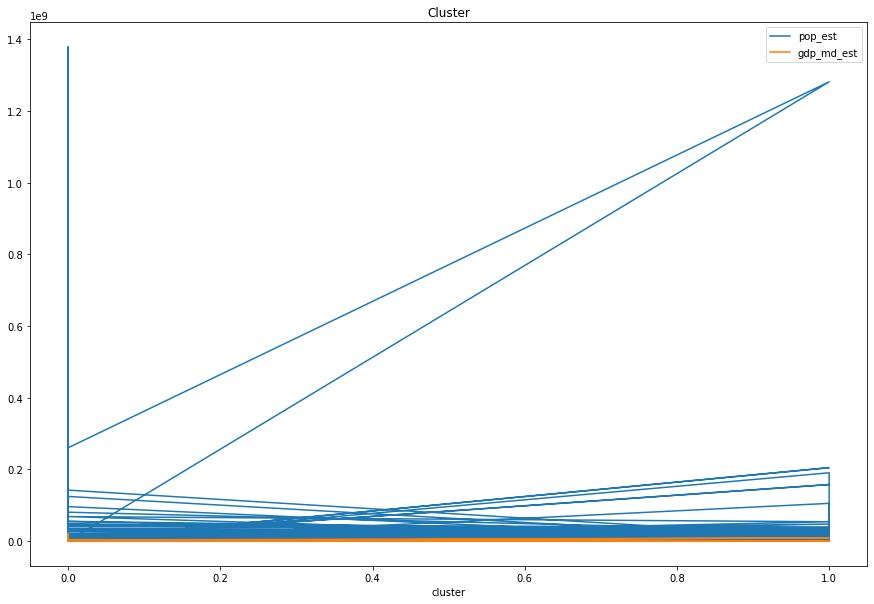

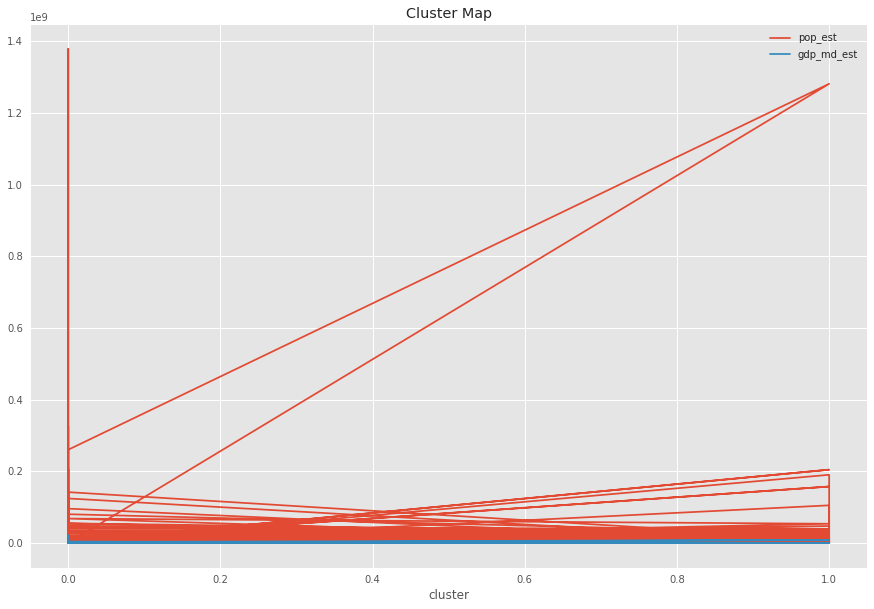

In [41]:
world_data.plot("cluster", figsize=(15,10))
plt.title("Cluster");

with plt.style.context(("seaborn", "ggplot")):
    world_data.plot("cluster",\
                               figsize=(15,10))
                               #edgecolor="black",)
    plt.title("Cluster Map")

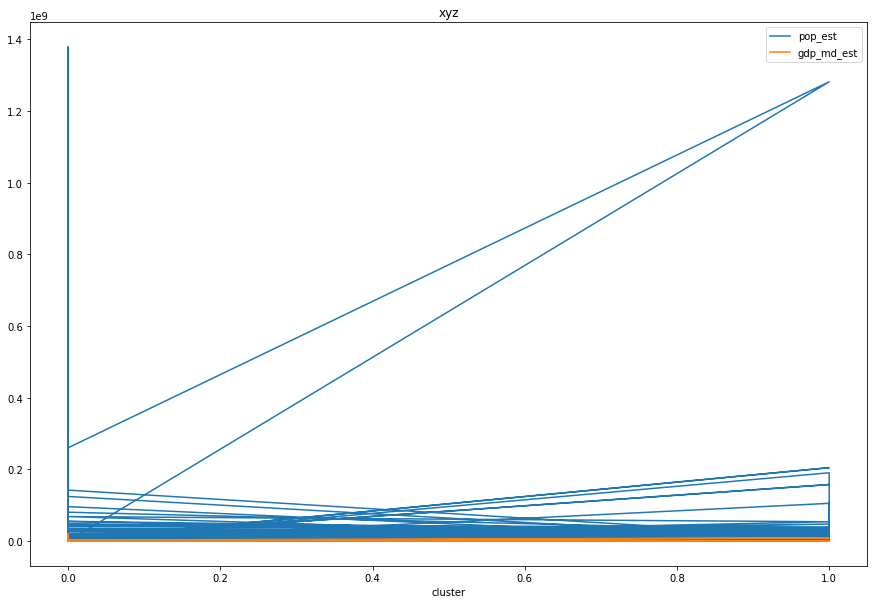

In [42]:
world_data.plot("cluster", figsize=(15,10))
plt.title("xyz");